# Speech Brain

## **What can I do with SpeechBrain?**

SpeechBrain can already do a lot of cool things. You can use SpeechBrain for the following types of problems:

- **speech classification** (many-to-one, e.g. speaker-id)
- **speech regression** (speech-to-speech mapping, e.g, speech enhancement)
- **sequence-to-sequence** (speech to speech mapping, e.g., speech recognition)

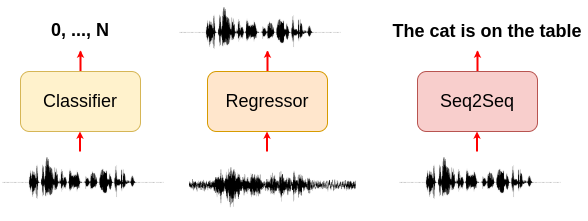

More precisely, SpeechBrain supports the following tasks:
- **Speech Recognition**: Speech-to-text ([see this tutorial](https://colab.research.google.com/drive/1aFgzrUv3udM_gNJNUoLaHIm78QHtxdIz?usp=sharing))
- **Speaker Recognition**: Speaker verification/ID ([see this tutorial](https://colab.research.google.com/drive/1UwisnAjr8nQF3UnrkIJ4abBMAWzVwBMh?usp=sharing)).
- **Speaker Diarization**: Detect who spoke when.
- **Speech Enhancement**: Noisy to clean speech ([see this tutorial](https://colab.research.google.com/drive/18RyiuKupAhwWX7fh3LCatwQGU5eIS3TR?usp=sharing)).
- **Speech Separation**: Separate overlapped speech ([see this tutorial](https://colab.research.google.com/drive/1YxsMW1KNqP1YihNUcfrjy0zUp7FhNNhN?usp=sharing)). 
- **Spoken Language Understanding**: Speech to intent/slots. 
- **Multi-microphone processing**: Combining input signals ([see this tutorial](https://colab.research.google.com/drive/1UVoYDUiIrwMpBTghQPbA6rC1mc9IBzi6?usp=sharing)). 

Many other systems are yet to come. For all this tasks we provide recipes that allow users training a model from scratch. We made available all the pre-trained model and logs for all the experiments [here](https://drive.google.com/drive/folders/1ZVuROxR711Xib2MsJbcPla4PWqbK1Ddw?usp=sharing).

 In this brief tutorial, we just show how to use some of the pre-trained models made available on [HuggingFace](https://huggingface.co/speechbrain/). First of all, let's install SpeechBrain:

If you prefer, you can use the version available with PyPI:

In [ ]:
%%capture
%pip install soundfile
%pip install speechbrain
%pip install transformers

: 

In [ ]:
%%capture
%pip install torch

Once installed, you should be able to import the speechbrain project with python:

In [1]:
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
torchvision is not available - cannot save figures
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


## **Speech Recognition on Different Languages**

### *English*

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")
asr_model.transcribe_file('speechbrain/asr-crdnn-rnnlm-librispeech/example.wav')

: 

In [ ]:
signal = read_audio("example.wav").squeeze()
Audio(signal, rate=16000)

## *French*

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-fr", savedir="pretrained_models/asr-crdnn-commonvoice-fr")
asr_model.transcribe_file("speechbrain/asr-crdnn-commonvoice-fr/example-fr.wav")

In [ ]:
signal = read_audio("example-fr.wav").squeeze()
Audio(signal, rate=44100)

## *Italian*

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-it", savedir="pretrained_models/asr-crdnn-commonvoice-it")
asr_model.transcribe_file("speechbrain/asr-crdnn-commonvoice-it/example-it.wav")

In [ ]:
signal = read_audio("example-it.wav").squeeze()
Audio(signal, rate=16000)

## *Mandarin*

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-transformer-aishell", savedir="pretrained_models/asr-transformer-aishell_model")
asr_model.transcribe_file("speechbrain/asr-transformer-aishell/example_mandarin.wav")

In [ ]:
signal = read_audio("example_mandarin.wav").squeeze()
Audio(signal, rate=16000)

## *Kinyarwanda*

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-wav2vec2-commonvoice-rw", savedir="pretrained_models/asr-wav2vec2-commonvoice-rw")
asr_model.transcribe_file("speechbrain/asr-wav2vec2-commonvoice-rw/example.mp3")

In [ ]:
signal = read_audio("example.mp3").squeeze()
Audio(signal, rate=44100)

## **Speech Separation**

We here show a mixture with 2 speakers, but we have a state-of-the-art system for separating mixture with 3 speakers as well. We also have models that deals witj noise and reverberation. [See your HuggingFace repository](https://huggingface.co/speechbrain/)

In [ ]:
from speechbrain.pretrained import SepformerSeparation as separator

model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
est_sources = model.separate_file(path='speechbrain/sepformer-wsj02mix/test_mixture.wav') 

In [ ]:
signal = read_audio("test_mixture.wav").squeeze()
Audio(signal, rate=8000)

In [ ]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [ ]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

## **Speech Enhancement**
The goal of speech enhancement is to remove the noise that affects a recording. 
Speechbrain has several systems for speech enhancement. In the following, you can find an example processed by the SepFormer (the version trained to perform enhancement):

In [ ]:
from speechbrain.pretrained import SepformerSeparation as separator
import torchaudio

model = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement')
enhanced_speech = model.separate_file(path='speechbrain/sepformer-whamr-enhancement/example_whamr.wav') 


In [ ]:
signal = read_audio("example_whamr.wav").squeeze()
Audio(signal, rate=8000)

In [ ]:
Audio(enhanced_speech[:, :].detach().cpu().squeeze(), rate=8000)

# **Speaker Verification**
The task here is to determine whether two sentences belong to the same speaker or not.

In [ ]:
from speechbrain.pretrained import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("speechbrain/spkrec-ecapa-voxceleb/example1.wav", "speechbrain/spkrec-ecapa-voxceleb/example2.flac")

print(prediction, score)

In [ ]:
signal = read_audio("example1.wav").squeeze()
Audio(signal, rate=16000)

In [ ]:
signal = read_audio("example2.flac").squeeze()
Audio(signal, rate=16000)

## **Speech Synthesys (Text-to-Speech)**
The goal of speech synthesys is to create a speech signal from the input text.
If the following you can find an example with the popular [Tacotron2](https://arxiv.org/abs/1712.05884) model coupled with [HiFiGAN](https://arxiv.org/abs/2010.05646) as a vocoder:

In [1]:
import torchaudio
from speechbrain.pretrained import Tacotron2
from speechbrain.pretrained import HIFIGAN

# Intialize TTS (tacotron2) and Vocoder (HiFIGAN)
tacotron2 = Tacotron2.from_hparams(source="speechbrain/tts-tacotron2-ljspeech", savedir="tmpdir_tts")
hifi_gan = HIFIGAN.from_hparams(source="speechbrain/tts-hifigan-ljspeech", savedir="tmpdir_vocoder")

# Running the TTS
mel_output, mel_length, alignment = tacotron2.encode_text("This is an open-source toolkit for the development of speech technologies.")

# Running Vocoder (spectrogram-to-waveform)
waveforms = hifi_gan.decode_batch(mel_output)

c:\Users\yilma\.virtualenvs\aij-L0AtPH4U\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


RuntimeError: Backend "soundfile" is not one of available backends: [].

In [2]:
Audio(waveforms.detach().cpu().squeeze(), rate=22050)

NameError: name 'Audio' is not defined

## **Other Tasks**
We support several other tasks. Click at the link below to see the pretrained model and the easy-inference function:

- [Speech Enhancement](https://huggingface.co/speechbrain/metricgan-plus-voicebank)
- [Command Recognition](https://huggingface.co/speechbrain/google_speech_command_xvector)
- [Spoken Language Understanding](https://huggingface.co/speechbrain/slu-timers-and-such-direct-librispeech-asr)
- [Urban Sound Classification](https://huggingface.co/speechbrain/urbansound8k_ecapa)

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```